In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
accident_df = pd.read_csv("C:\\Users\\mkk76\\OneDrive\\Documents\\GitHub\\SCT_DS_04\\accidents.csv")
accident_df.head()

,AccidentDate,Timing,State,WeatherCondition,RoadCondition,Deaths,Reason
0,04-02-2013,Morning,Alaska,Rainy,Under Construction,10,Drunk Driving
1,23-02-2005,Night,Arizona,Clear,Under Construction,3,Weather Conditions
2,08-10-2014,Afternoon,California,Clear,Fine,6,Poor Visibility
3,14-01-2015,Night,Colorado,Rainy,Rough,8,Road Conditions
4,17-01-2006,Afternoon,Georgia,Clear,Fine,2,Speeding


In [3]:
accident_df['AccidentDate'] = pd.to_datetime(accident_df['AccidentDate'], format='%d-%m-%Y')

In [4]:
print(accident_df.isnull().sum())

AccidentDate        0
Timing              0
State               0
WeatherCondition    0
RoadCondition       0
Deaths              0
Reason              0
dtype: int64


In [5]:
accident_df.columns = accident_df.columns.str.lower().str.replace(' ', '_')

In [6]:
weather_counts = accident_df['weathercondition'].value_counts()
print(weather_counts)

weathercondition
Foggy    16729
Clear    16664
Rainy    16607
Name: count, dtype: int64


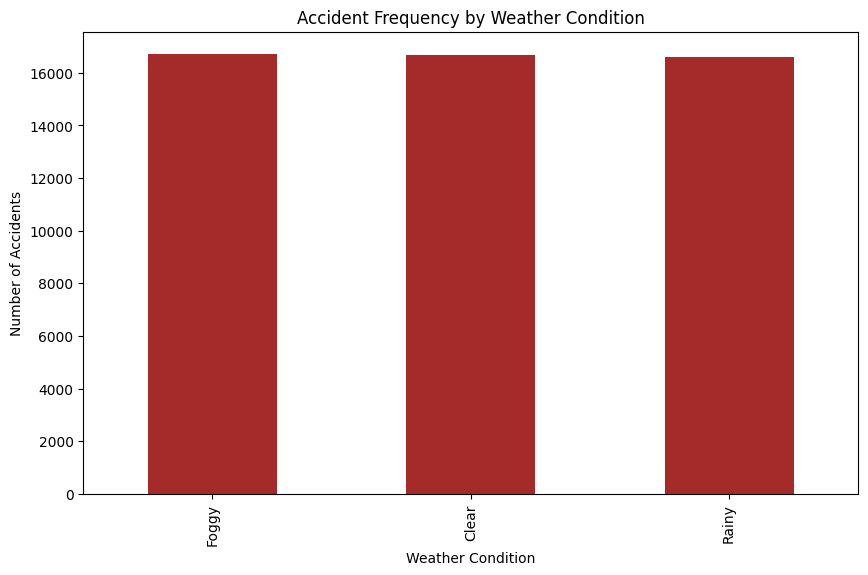

In [7]:
plt.figure(figsize=(10, 6))
weather_counts.plot(kind='bar', color='Brown')
plt.title('Accident Frequency by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.show()

In [8]:
road_condition_deaths = accident_df.groupby('roadcondition')['deaths'].mean()
print(road_condition_deaths)

roadcondition
Fine                  4.976220
Rough                 4.958110
Under Construction    5.014858
Name: deaths, dtype: float64


C:\Users\mkk76\AppData\Local\Temp\ipykernel_32088\78882092.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([accident_df[accident_df['roadcondition'] == condition]['deaths'] for condition in accident_df['roadcondition'].unique()],


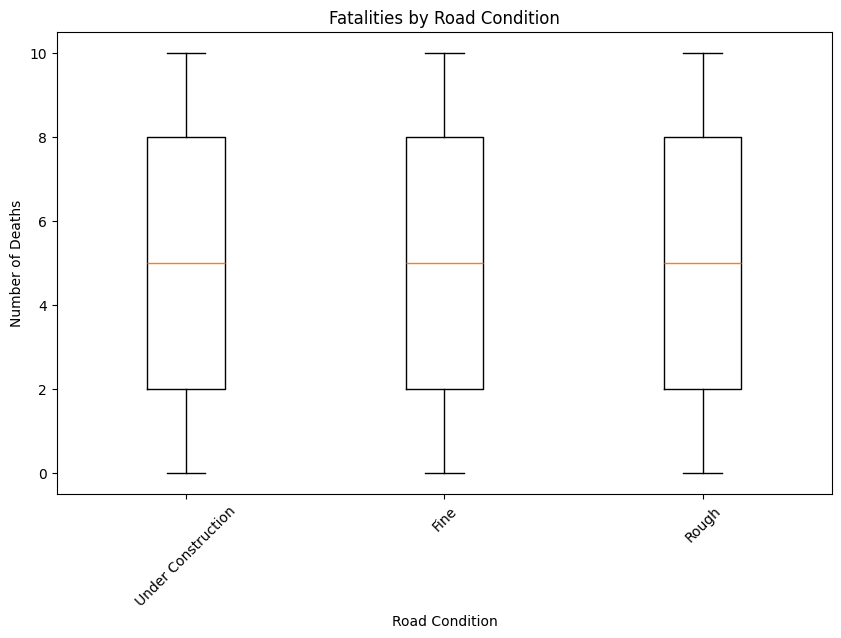

In [9]:
plt.figure(figsize=(10, 6))
plt.boxplot([accident_df[accident_df['roadcondition'] == condition]['deaths'] for condition in accident_df['roadcondition'].unique()],
            labels=accident_df['roadcondition'].unique())
plt.title('Fatalities by Road Condition')
plt.xlabel('Road Condition')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45)
plt.show()

In [10]:
time_counts = accident_df['timing'].value_counts()
print(time_counts)

timing
Night        16704
Afternoon    12638
Morning      12374
Evening       8284
Name: count, dtype: int64


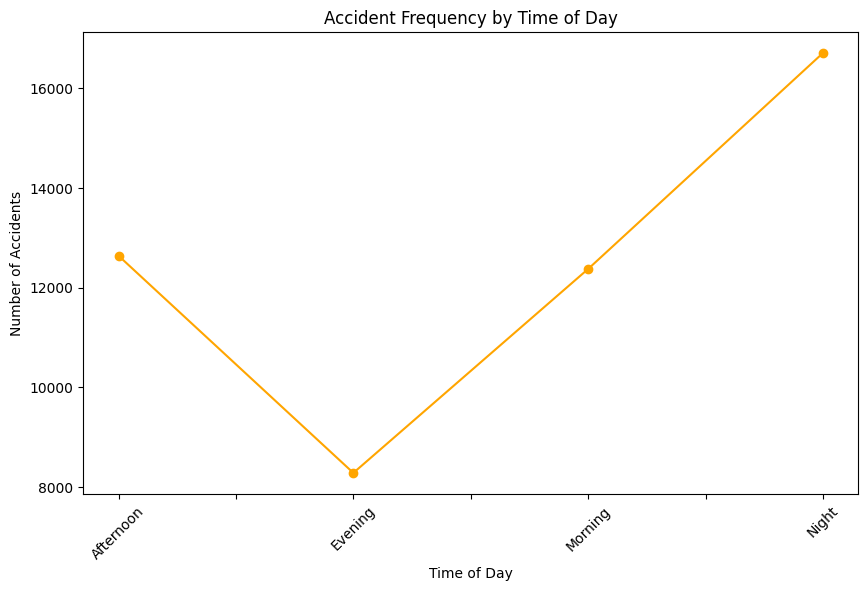

In [11]:
plt.figure(figsize=(10, 6))
time_counts.sort_index().plot(kind='line', marker='o', color='orange')
plt.title('Accident Frequency by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

In [12]:
reason_counts = accident_df['reason'].value_counts()
print(reason_counts)

reason
Poor Visibility       5694
Road Conditions       5677
Weather Conditions    5642
Driver Fatigue        5591
Distracted Driving    5538
Mechanical Failure    5511
Speeding              5497
Reckless Driving      5459
Drunk Driving         5391
Name: count, dtype: int64


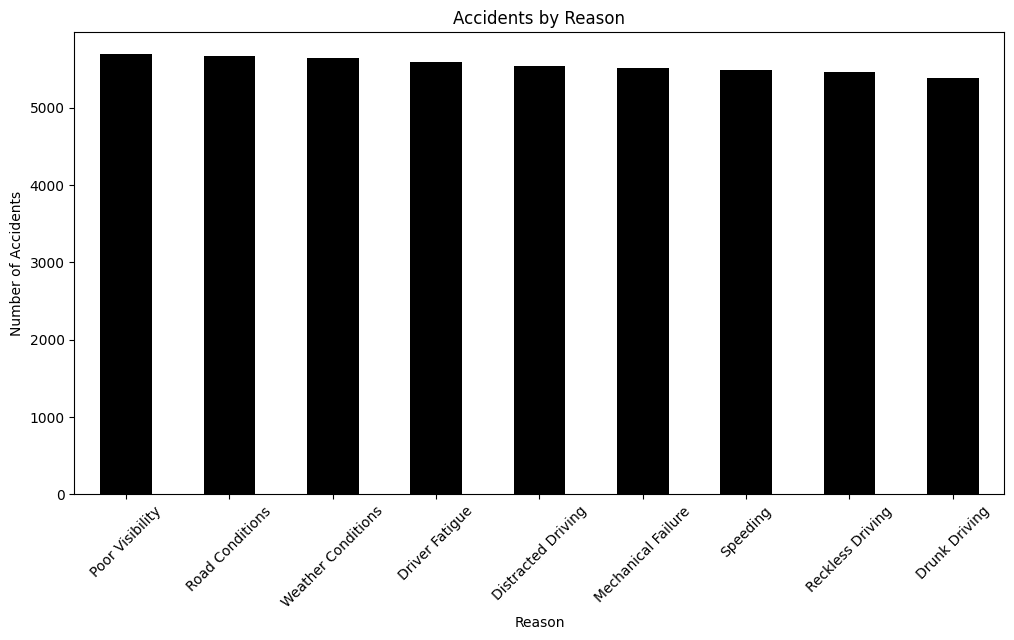

In [13]:
plt.figure(figsize=(12, 6))
reason_counts.plot(kind='bar', color='black')
plt.title('Accidents by Reason')
plt.xlabel('Reason')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()